In [ ]:
# Time Series - Trend, Seasonality, Cyclicity 

<img src = "https://www.machinelearningplus.com/wp-content/uploads/2019/02/5_Patterns_in_Time_Series-min.png?ezimgfmt=ng:webp/ngcb4"/>

In [ ]:
# TS = Base + Trend + Seasonality + Error (Residual)

In [ ]:
# Rolling Mean
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a = np.array([34, 35, 35, 36, 37, 34, 33, 32, 36, 98, 34, 35, 32, 35, 34, 33])

In [ ]:
a

array([34, 35, 35, 36, 37, 34, 33, 32, 36, 98, 34, 35, 32, 35, 34, 33])

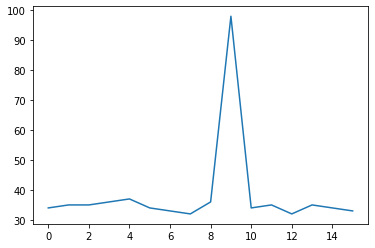

In [ ]:
plt.plot(a)

In [ ]:
np.mean(a)

38.3125

In [ ]:
df = pd.DataFrame(a, columns= ["sales"])

In [ ]:
df

sales
0      34
1      35
2      35
3      36
4      37
5      34
6      33
7      32
8      36
9      98
10     34
11     35
12     32
13     35
14     34
15     33

In [ ]:
df.sales.rolling(3).mean()

0           NaN
1           NaN
2     34.666667
3     35.333333
4     36.000000
5     35.666667
6     34.666667
7     33.000000
8     33.666667
9     55.333333
10    56.000000
11    55.666667
12    33.666667
13    34.000000
14    33.666667
15    34.000000
Name: sales, dtype: float64

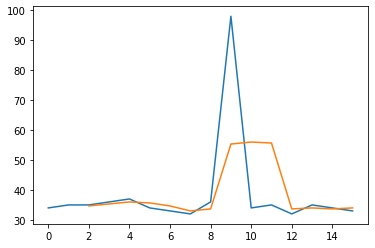

In [ ]:
plt.plot(df.sales)
plt.plot(df.sales.rolling(3).mean()) #smoothing of graph

In [ ]:
df = pd.read_csv("AirPassengers.csv")

In [ ]:
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
df = df.rename(columns={"#Passengers":"Passengers"})

In [ ]:
df.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.Month = pd.to_datetime(df.Month)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.Month.dt.month_name()

0        January
1       February
2          March
3          April
4            May
         ...    
139       August
140    September
141      October
142     November
143     December
Name: Month, Length: 144, dtype: object

In [ ]:
df.head()

Month  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121

In [ ]:
df.Month.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
df = df.set_index(df.Month).drop(columns=["Month"])

In [ ]:
df

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

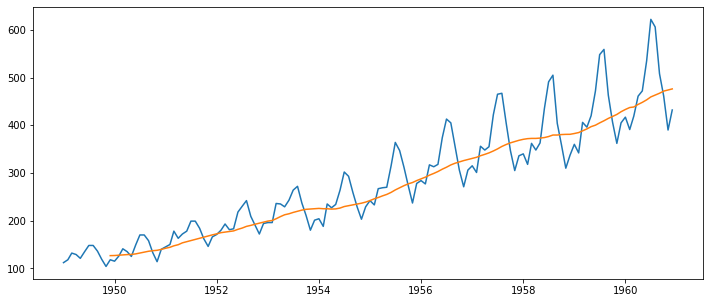

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df)
plt.plot(df.Passengers.rolling(12).mean())

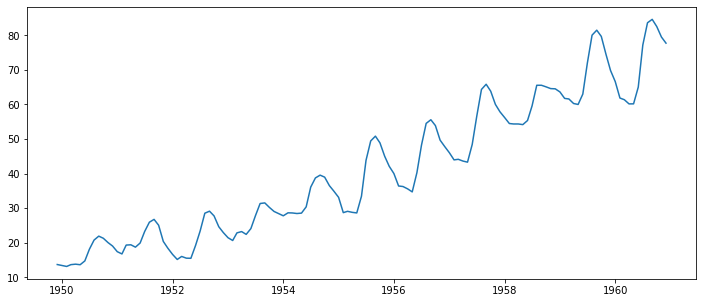

In [ ]:
plt.figure(figsize=(12, 5))
# plt.plot(df)
plt.plot(df.Passengers.rolling(12).std())

In [ ]:
# statsmodel
# ! pip install statsmodels

In [ ]:
! pip show statsmodels

Name: statsmodels
Version: 0.10.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, numpy, scipy, patsy
Required-by: plotnine


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfResults = adfuller(df.Passengers)

In [ ]:
adfResults

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [ ]:
adfOut = pd.Series(adfResults[:4], index=["Test Stats", "P-Value", "#Lag used", "# of observations"])
for key, value in adfResults[4].items():
  adfOut[f'Critical Value {key}'] = value

In [60]:
adfOut

Test Stats              0.815369
P-Value                 0.991880
#Lag used              13.000000
# of observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64

In [ ]:
# Test Stats should be less than Critical Value 5% - TS is stationary 

In [ ]:
# This TS is not stationary

In [63]:
def testStationary(df):
  plt.figure(figsize=(12, 5))
  plt.plot(df, label="Original")
  plt.plot(df.Passengers.rolling(12).mean(), label="Rolling Mean")
  plt.plot(df.Passengers.rolling(12).std(), label="Rolling STD")
  plt.legend()

  adfResults = adfuller(df.Passengers)
  adfOut = pd.Series(adfResults[:4], index=["Test Stats", "P-Value", "#Lag used", "# of observations"])
  for key, value in adfResults[4].items():
    adfOut[f'Critical Value {key}'] = value
  print(adfOut)

Test Stats              0.815369
P-Value                 0.991880
#Lag used              13.000000
# of observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64


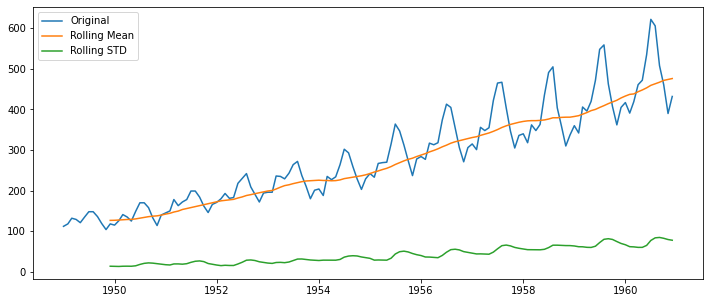

In [64]:
testStationary(df)

In [ ]:
# Transformation of TS to make them stationary! 

In [ ]:
# Log, Sqrt, Polyn

In [65]:
df_log = np.log(df)

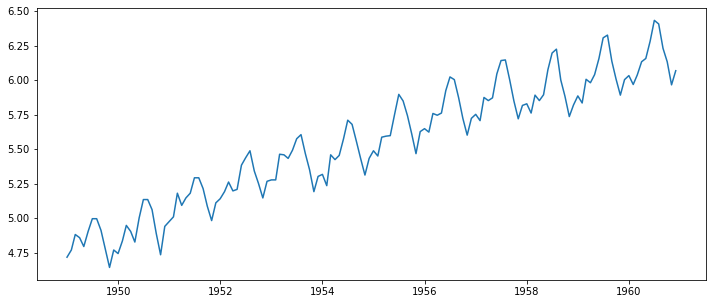

In [68]:
plt.figure(figsize=(12, 5))
# plt.plot(df)
plt.plot(df_log)

Test Stats             -1.717017
P-Value                 0.422367
#Lag used              13.000000
# of observations     130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64


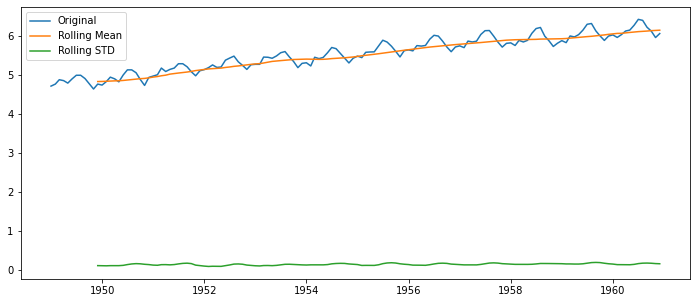

In [69]:
testStationary(df_log)

In [70]:
# Reduction

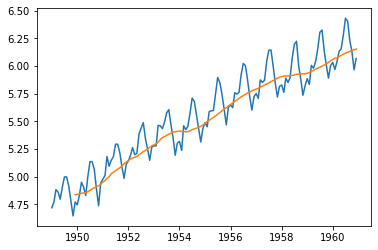

In [71]:
plt.plot(df_log)
plt.plot(df_log.Passengers.rolling(12).mean())

In [72]:
df_log_no_trend = df_log - df_log.rolling(12).mean()

In [74]:
df_log_no_trend

Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789

[144 rows x 1 columns]

In [75]:
df_log_no_trend = df_log_no_trend.dropna()

Test Stats             -3.162908
P-Value                 0.022235
#Lag used              13.000000
# of observations     119.000000
Critical Value 1%      -3.486535
Critical Value 5%      -2.886151
Critical Value 10%     -2.579896
dtype: float64


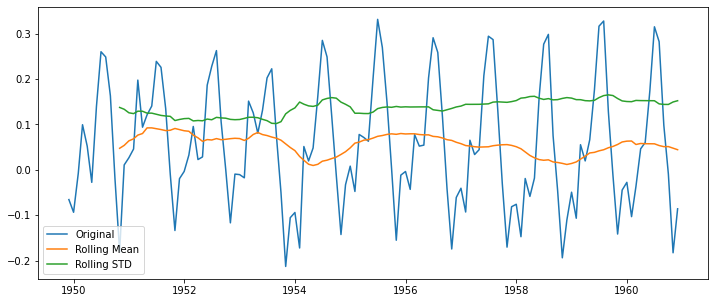

In [76]:
testStationary(df_log_no_trend)

In [77]:
# Decomposition

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
decompose = seasonal_decompose(df_log)

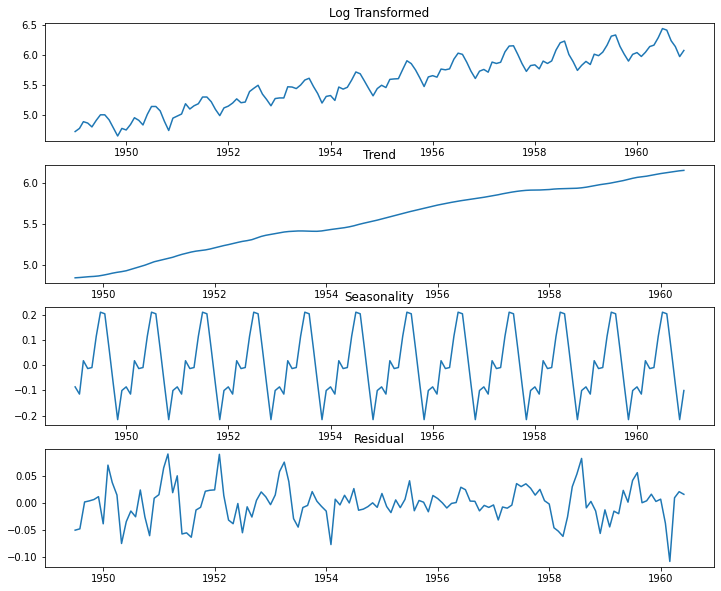

In [82]:
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.title("Log Transformed")
plt.plot(df_log)

plt.subplot(412)
plt.title("Trend")
plt.plot(decompose.trend)

plt.subplot(413)
plt.title("Seasonality")
plt.plot(decompose.seasonal)

plt.subplot(414)
plt.title("Residual")
plt.plot(decompose.resid)

In [85]:
df_log_residual = decompose.resid.dropna()

Test Stats           -6.332387e+00
P-Value               2.885059e-08
#Lag used             9.000000e+00
# of observations     1.220000e+02
Critical Value 1%    -3.485122e+00
Critical Value 5%    -2.885538e+00
Critical Value 10%   -2.579569e+00
dtype: float64


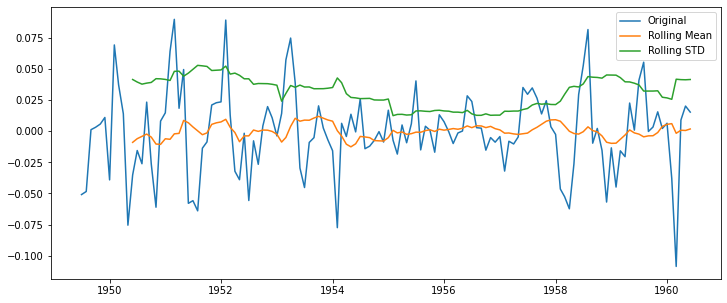

In [86]:
testStationary(df_log_residual)

In [87]:
df_log_diff = df_log - df_log.shift(2)

In [88]:
df_log_diff.dropna(inplace=True)

In [ ]:
# ARIMA (Automated Regressive Integrated Moving Average)
# 1. # of auto regression (p): PACF
# 2. # of moving average  (q): ACF
# 3. # of differences     (d):

# ACF - Auto Correlation Function (q)
# PACF - Partial ACF (p)

In [89]:
from statsmodels.tsa.stattools import acf, pacf

In [90]:
acf(df_log_diff, nlags=12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.53501222, -0.0738737 , -0.30248819, -0.36210495,
       -0.19849439, -0.06691657, -0.22467414, -0.375865  , -0.28325205,
       -0.05289305,  0.47847371,  0.87571977])

In [91]:
pacf(df_log_diff, nlags=12, method='ols')

array([ 1.        ,  0.535996  , -0.51390863,  0.04178185, -0.34936828,
        0.20344156, -0.40357224, -0.33552617, -0.46558417, -0.37929089,
       -0.73582226,  0.65017354,  0.25968544])

In [92]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
model = ARIMA(df_log, order=(2,1,2))  
result_log_arima = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


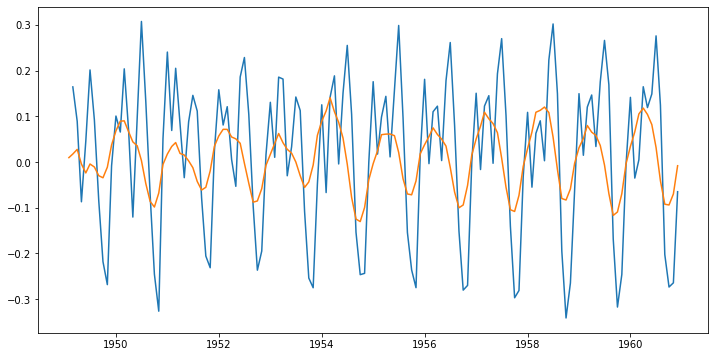

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(df_log_diff)
plt.plot(result_log_arima.fittedvalues)

In [101]:
arima_result_diff = pd.Series(result_log_arima.fittedvalues)

In [102]:
arima_result_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [103]:
arima_result_diff_cumsum = arima_result_diff.cumsum()

In [104]:
arima_result_diff_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372553
1960-09-01    1.280203
1960-10-01    1.186190
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64

In [105]:
arima_result_ = pd.Series(df_log.Passengers, index=df_log.index)
arima_result_ = arima_result_.add(arima_result_diff_cumsum, fill_value=0)

In [106]:
arima_result = np.exp(arima_result_)

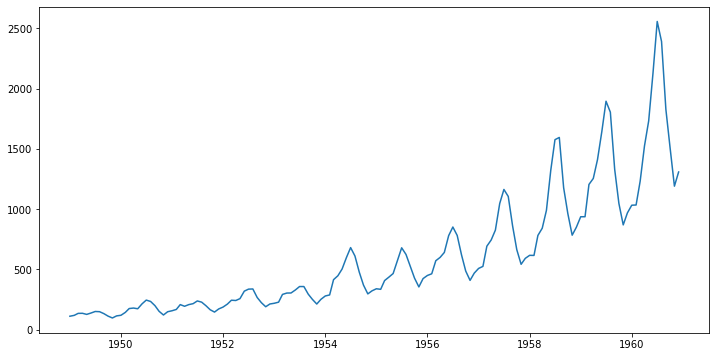

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(arima_result)